In [1]:
import torch
import math
import os 
import sys

import importlib
import hivit
importlib.reload(hivit)

from hivit.parameters import Parameters
from hivit.hilbert_potitional_embedding import PatchEmbeddingHilbertPositionalEmbedding
from hivit.no_positional_embedding import PatchEmbeddingNoPositionalEmbedding
from hivit.learned_positional_embedding import PatchEmbeddingLearnedPositionalEmbedding
from hivit.cut_out import Cutout
from hivit.training import training_loop
from hivit.test_model import test_model
from datetime import datetime
from hivit.cifar10_dataloader import cifar10_dataloader

In [2]:
if torch.backends.mps.is_available(): 
    device = "mps"
elif torch.cuda.is_available():
    device = "cuda"
else:
    print("Metal or CUDA is not found!")
    sys.exit(1)

print(device)

mps


In [3]:
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
working_folder = f"experiment_results/cifar10_{current_time}"
os.makedirs(working_folder, exist_ok=True)

parameters = Parameters()

parameters.print()

parameters.save_to_json(os.path.join(working_folder, "parameters.json"))

{'RANDOM_SEED': 42, 'BATCH_SIZE': 512, 'EPOCHS': 2, 'PATIENCE': 20, 'LEARNING_RATE': 0.001, 'NUM_CLASSES': 10, 'PATCH_SIZE': 4, 'IMAGE_SIZE': 32, 'IN_CHANNELS': 3, 'NUM_HEADS': 12, 'DROPOUT': 0.3, 'HIDDEN_DIM': 1024, 'ADAM_WEIGHT_DECAY': 0, 'ADAM_BETAS': (0.9, 0.999), 'ACTIVATION': 'gelu', 'NUM_ENCODERS': 12, 'EMBEDING_DIMENTION': 48, 'NUM_PATCHES': 64, 'DATASET_ROOT': './data'}


In [4]:
train_dataloader, val_dataloader, test_dataloader = cifar10_dataloader(parameters.DATASET_ROOT, parameters.BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


/Users/nihat/mambaforge/envs/bachelor-project/lib/python3.12/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
 50%|█████     | 1/2 [02:34<02:34, 154.92s/it]

Epoch 1: New best model saved with val_loss: 2.1166
------------------------------
Train Loss EPOCH 1: 2.1665
Valid Loss EPOCH 1: 2.1166
Train Accuracy EPOCH 1: 0.1820
Valid Accuracy EPOCH 1: 0.1918
------------------------------


100%|██████████| 2/2 [05:07<00:00, 153.60s/it]


Epoch 2: New best model saved with val_loss: 2.0407
------------------------------
Train Loss EPOCH 2: 2.0822
Valid Loss EPOCH 2: 2.0407
Train Accuracy EPOCH 2: 0.2144
Valid Accuracy EPOCH 2: 0.2268
------------------------------
Completed all epochs without early stopping.
Training Time: 307.21s


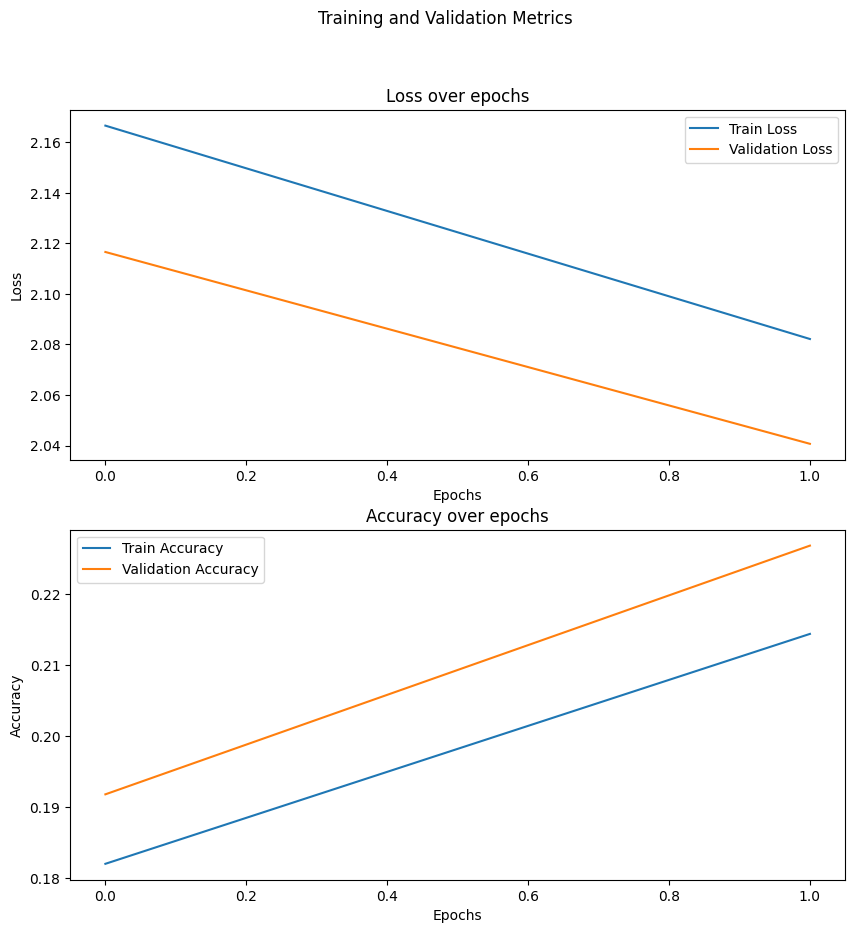

100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

Test Loss: 2.0523
Test Accuracy: 0.2199


In [5]:
learned_postional_embedding = PatchEmbeddingLearnedPositionalEmbedding(parameters.EMBEDING_DIMENTION, parameters.PATCH_SIZE, parameters.NUM_PATCHES, parameters.DROPOUT, parameters.IN_CHANNELS)
model_learned = training_loop(
    working_folder=working_folder,
    training_name="learned_training",
    embedding_strategy=learned_postional_embedding, 
    checkpoint_file_name='best_model_learned_embedding.pt', 
    device=device, 
    train_dataloader=train_dataloader, 
    val_dataloader=val_dataloader, 
    EPOCHS=parameters.EPOCHS,
    PATIENCE=parameters.PATIENCE,
    LEARNING_RATE=parameters.LEARNING_RATE,
    NUM_CLASSES=parameters.NUM_CLASSES,
    PATCH_SIZE=parameters.PATCH_SIZE,
    IMAGE_SIZE=parameters.IMAGE_SIZE,
    IN_CHANNELS=parameters.IN_CHANNELS,
    NUM_HEADS=parameters.NUM_HEADS,
    DROPOUT=parameters.DROPOUT,
    HIDDEN_DIM=parameters.HIDDEN_DIM,
    ADAM_WEIGHT_DECAY=parameters.ADAM_WEIGHT_DECAY,
    ADAM_BETAS=parameters.ADAM_BETAS,
    ACTIVATION=parameters.ACTIVATION,
    NUM_ENCODERS=parameters.NUM_ENCODERS,
    EMBEDING_DIMENTION=parameters.EMBEDING_DIMENTION,
    NUM_PATCHES=parameters.NUM_PATCHES)

test_model(working_folder=working_folder, 
           training_name="learned_test",  
           model=model_learned, 
           checkpoint_path='best_model_learned_embedding.pt', 
           device=device, 
           test_dataloader=test_dataloader)

In [7]:
hilbert_embedding = PatchEmbeddingHilbertPositionalEmbedding(parameters.EMBEDING_DIMENTION, parameters.PATCH_SIZE, parameters.NUM_PATCHES, parameters.DROPOUT, parameters.IN_CHANNELS, parameters.IMAGE_SIZE)
model_hilbert = training_loop(
    working_folder=working_folder,
    training_name="hilbert_training",
    embedding_strategy=hilbert_embedding, 
    checkpoint_file_name='hilbert_embedding.pt',
    device=device, 
    train_dataloader=train_dataloader, 
    val_dataloader=val_dataloader, 
    EPOCHS=parameters.EPOCHS,
    PATIENCE=parameters.PATIENCE,
    LEARNING_RATE=parameters.LEARNING_RATE,
    NUM_CLASSES=parameters.NUM_CLASSES,
    PATCH_SIZE=parameters.PATCH_SIZE,
    IMAGE_SIZE=parameters.IMAGE_SIZE,
    IN_CHANNELS=parameters.IN_CHANNELS,
    NUM_HEADS=parameters.NUM_HEADS,
    DROPOUT=parameters.DROPOUT,
    HIDDEN_DIM=parameters.HIDDEN_DIM,
    ADAM_WEIGHT_DECAY=parameters.ADAM_WEIGHT_DECAY,
    ADAM_BETAS=parameters.ADAM_BETAS,
    ACTIVATION=parameters.ACTIVATION,
    NUM_ENCODERS=parameters.NUM_ENCODERS,
    EMBEDING_DIMENTION=parameters.EMBEDING_DIMENTION,
    NUM_PATCHES=parameters.NUM_PATCHES)

test_model(working_folder=working_folder, 
           training_name="hilbert_test",  
           model=model_hilbert, 
           checkpoint_path='hilbert_embedding.pt', 
           device=device, 
           test_dataloader=test_dataloader)

Order is  3


  9%|▉         | 8/88 [00:16<02:18,  1.74s/it]

In [ ]:
no_postional_embedding = PatchEmbeddingNoPositionalEmbedding(parameters.EMBEDING_DIMENTION, parameters.PATCH_SIZE, parameters.NUM_PATCHES, parameters.DROPOUT, parameters.IN_CHANNELS)
model_no_embedding = training_loop(
    working_folder=working_folder,
    training_name="no_positional_embedding_training"
    embedding_strategy=no_postional_embedding, 
    checkpoint_file_name='best_model_no_embedding.pt', 
    device=device, 
    train_dataloader=train_dataloader, 
    val_dataloader=val_dataloader, 
    EPOCHS=parameters.EPOCHS,
    PATIENCE=parameters.PATIENCE,
    LEARNING_RATE=parameters.LEARNING_RATE,
    NUM_CLASSES=parameters.NUM_CLASSES,
    PATCH_SIZE=parameters.PATCH_SIZE,
    IMAGE_SIZE=parameters.IMAGE_SIZE,
    IN_CHANNELS=parameters.IN_CHANNELS,
    NUM_HEADS=parameters.NUM_HEADS,
    DROPOUT=parameters.DROPOUT,
    HIDDEN_DIM=parameters.HIDDEN_DIM,
    ADAM_WEIGHT_DECAY=parameters.ADAM_WEIGHT_DECAY,
    ADAM_BETAS=parameters.ADAM_BETAS,
    ACTIVATION=parameters.ACTIVATION,
    NUM_ENCODERS=parameters.NUM_ENCODERS,
    EMBEDING_DIMENTION=parameters.EMBEDING_DIMENTION,
    NUM_PATCHES=parameters.NUM_PATCHES)

test_model(working_folder=working_folder, 
           training_name="no_positional_embedding_test",
           model=model_no_embedding, 
           checkpoint_path='best_model_no_embedding.pt', 
           device=device, 
           test_dataloader=test_dataloader)